In [132]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

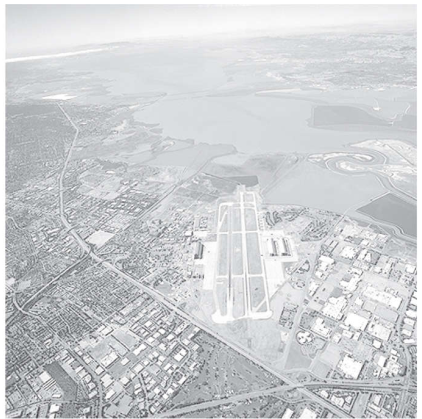

In [133]:
city_img = cv2.imread('/content/city_image.png')
cv2_imshow(city_img)

# Gamma Correction

In [134]:
i = 0
for gamma in [0.5, 2, 3, 4]:     
  i = i + 1
  gamma_corrected = np.array(255*(city_img / 255) ** gamma, dtype = 'uint8')
  cv2.imwrite('gamma_transformed'+str(i)+'.jpg', gamma_corrected)  

Plot Images

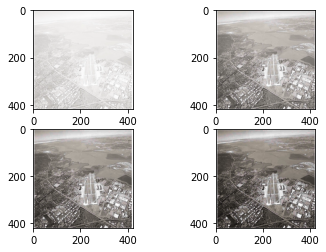

In [135]:
gamma_image1 = cv2.imread('gamma_transformed1.jpg')
gamma_image2 = cv2.imread('gamma_transformed2.jpg')
gamma_image3 = cv2.imread('gamma_transformed3.jpg')
gamma_image4 = cv2.imread('gamma_transformed4.jpg')

plt.subplot( 2, 2, 1 ), plt.imshow(gamma_image1)
plt.subplot( 2, 2, 2 ), plt.imshow(gamma_image2)
plt.subplot( 2, 2, 3 ), plt.imshow(gamma_image3)
plt.subplot( 2, 2, 4 ), plt.imshow(gamma_image4)

plt.show()

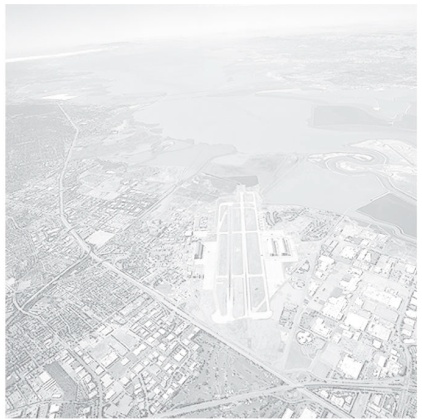

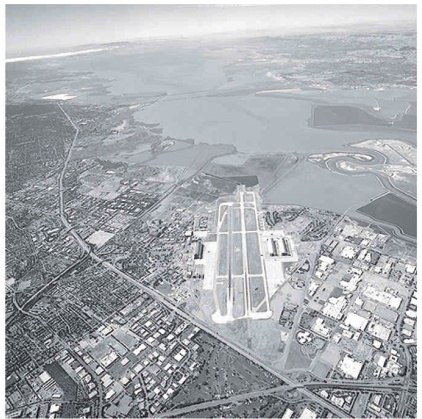

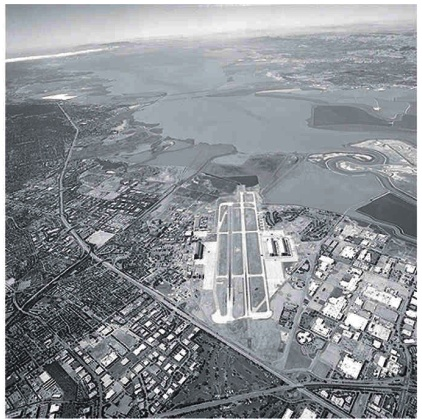

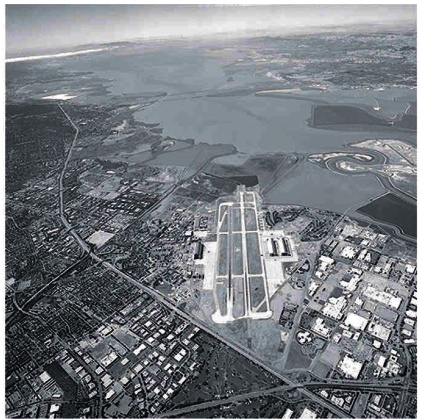

In [136]:
cv2_imshow(gamma_image1)
cv2_imshow(gamma_image2)
cv2_imshow(gamma_image3)
cv2_imshow(gamma_image4)

# Constrast Stretching

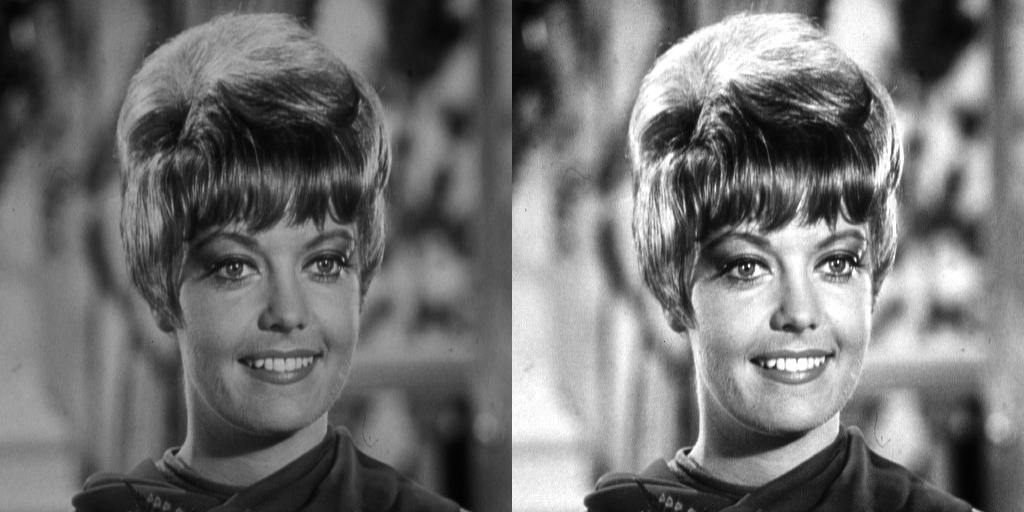

In [137]:
celeb_img = cv2.imread('/content/celeb_image.png')
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

# Define parameters.
r1 = 30
s1 = 30
r2 = 160
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(celeb_img, r1, s1, r2, s2)
  
# Save edited image.
cv2.imwrite('contrast_stretch.jpg', contrast_stretched)
j = j + 1

res = np.hstack((celeb_img, cv2.imread('contrast_stretch.jpg')))
cv2_imshow(res)


Input Image

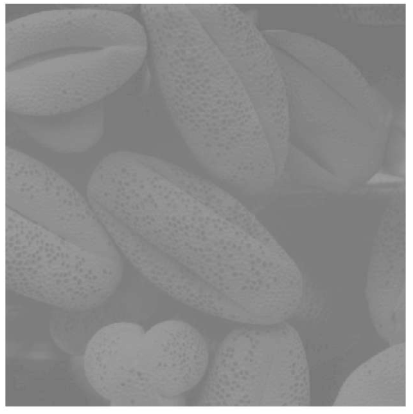

In [138]:
cell_img = cv2.imread('/content/cell_image.png', 0)
cv2_imshow(cell_img)

Output Images

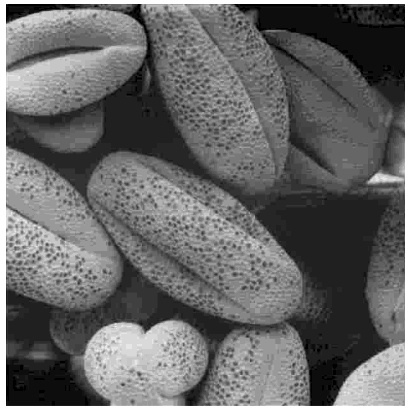

In [139]:
r1 = 120
s1 = 0
r2 = 160
s2 = 255


# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(cell_img, r1, s1, r2, s2)
  
# Save edited image.
cv2.imwrite('contrast_stretch2.jpg', contrast_stretched)

cv2_imshow(cv2.imread('contrast_stretch2.jpg'))

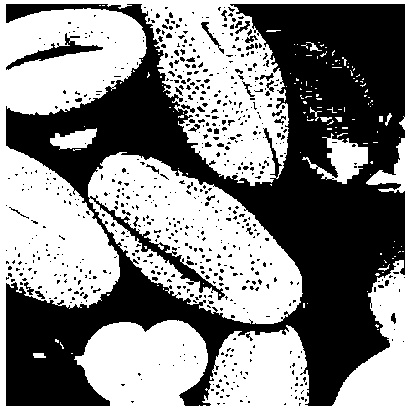

In [140]:
r1 = 135
s1 = 0
r2 = 135
s2 = 255

cell_img = cv2.imread('/content/cell_image.png', 0)

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(cell_img, r1, s1, r2, s2)
  
# Save edited image.
cv2.imwrite('contrast_stretch2.jpg', contrast_stretched)

cv2_imshow(cv2.imread('contrast_stretch2.jpg'))

# Histogram Equalization


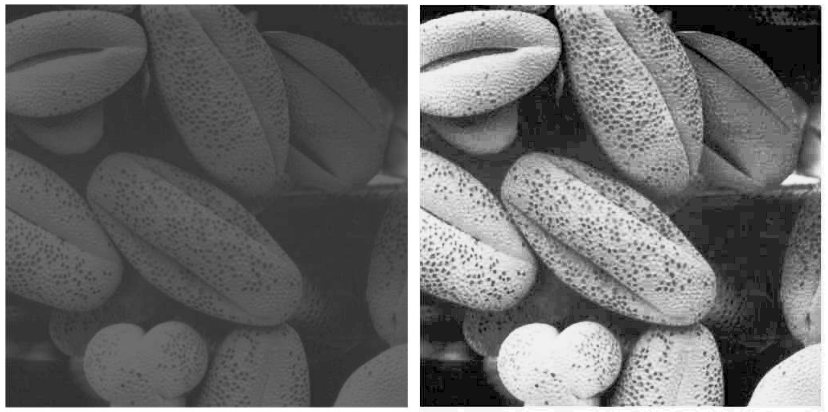

In [141]:
cell_img = cv2.imread('/content/cell_image2.png', 0)
# creating a Histograms Equalization
# of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(cell_img)
  
# stacking images side-by-side
res = np.hstack((cell_img, equ))
  
# show image input vs output
cv2_imshow(res)